In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_profiling
import statsmodels.api as sm
from scipy import stats
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas import datetime
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from arch import arch_model
from sklearn.metrics import mean_squared_error

In [2]:
consump_k12 = pd.read_csv("C:/Users/arito/Documents/DePaul/DSC672/Daily Aggregated Files/consump_agg_sectors/consump_k12_daily_agg.csv")

In [3]:
consump_k12['Date_Time'] = pd.to_datetime(consump_k12['Date_Time'])
consump_k12_ind = consump_k12.set_index('Date_Time')

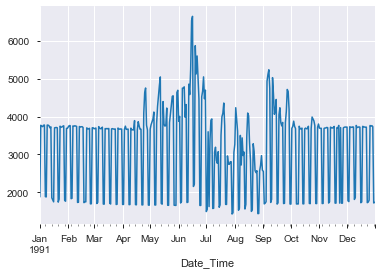

In [4]:
consump_k12_ind['Electricity_KW_AVG'].plot(linewidth=1.5)

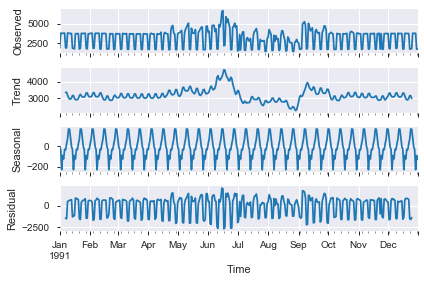

In [5]:
result = seasonal_decompose(consump_k12_ind['Electricity_KW_AVG'], freq=12)
result.plot()
plt.xlabel("Time")
pyplot.show()

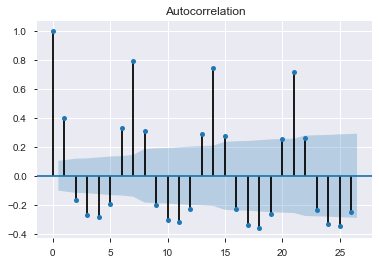

In [6]:
sm.graphics.tsa.plot_acf(consump_k12_ind['Electricity_KW_AVG'].values.squeeze())
plt.show()

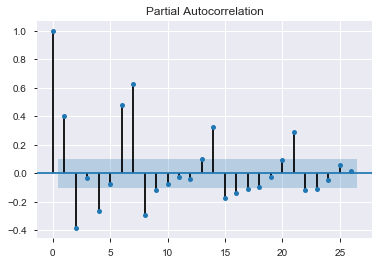

In [7]:
sm.graphics.tsa.plot_pacf(consump_k12_ind['Electricity_KW_AVG'].values.squeeze())
plt.show()

In [8]:
consump_k12_time = consump_k12.iloc[:,0:2]
consump_k12_time.head()

,Date_Time,Electricity_KW_AVG
0,1991-01-01,1880.461136
1,1991-01-02,3768.909435
2,1991-01-03,3744.025377
3,1991-01-04,3733.620125
4,1991-01-05,3769.337608


In [9]:
consump_k12_x = consump_k12.iloc[:,2:]
consump_k12_x.head()

,Weekend,Holiday,School_Day,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Precipitable_Water_AVG,Temperature_AVG,Visibility_AVG,Month_1,...,Day_30,Day_31,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Day_of_week_7,Season_Summer,Season_Winter
0,1,1,0,-18.476732,0.950000,-12.883333,5.208333,-9.441667,8.470833,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,-18.411217,0.458333,-14.670833,4.833333,-9.570833,16.100000,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,-18.339779,0.583333,-11.320833,5.583333,-4.670833,16.100000,1,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,-18.262442,0.862500,-13.825000,5.083333,-10.016667,8.725000,1,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,-18.179237,0.554167,-20.070833,3.833333,-16.716667,10.675000,1,...,0,0,0,0,0,1,0,0,0,1


In [10]:
train_time = np.array(consump_k12_time.Electricity_KW_AVG[0:292])
test_time = np.array(consump_k12_time.Electricity_KW_AVG[292:])
train_exo = np.array(consump_k12_x[0:292])
test_exo = np.array(consump_k12_x[292:])

In [18]:
model = SARIMAX(train_time, exog=train_exo, order=(2, 0, 0), seasonal_order=(0, 0, 0, 0))

In [19]:
model_fit = model.fit(disp=True)

C:\Users\arito\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [28]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  292
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -2078.506
Date:                Tue, 29 Oct 2019   AIC                           4261.013
Time:                        17:32:20   BIC                           4452.204
Sample:                             0   HQIC                          4337.596
                                - 292                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1          1140.2838    224.412      5.081      0.000     700.443    1580.124
x2         -1333.4477     90.265    -14.773      0.000   -1510.363   -1156.532
x3           178.0378     86.228      2.065      0.039       9.034     347.041
x4           -13.0142     12.326     -1.056      0.291     -37.172      11.144
x5          -272.8236    106.130     -2.571      0.010    -480.834     -64.813
x6           -54.3461     15.204     -3.574      0.000     -84.146     -24.546
x7            56.7266      8.663      6.548      0.000      39.748      73.705
x8            46.8285     16.703      2.804      0.005      14.091      79.566
x9           -20.1067      7.784     -2.583      0.010     -35.364      -4.850
x10           45.7780    172.865      0.265      0.791    -293.031     384.587
x11           38.1537    132.308      0.288      0.773    -221.164     297.472
x12          159.1171    156.052      1.020      0.308    -146.740     464.974
x13          366.2470    186.311      1.966      0.049       1.083     731.411
x14         -810.3252    181.122     -4.474      0.000   -1165.319    -455.332
x15         -808.0791    123.535     -6.541      0.000   -1050.204    -565.954
x16         -133.2277    204.930     -0.650      0.516    -534.883     268.428
const       3.029e-12      6.117   4.95e-13      1.000     -11.990      11.990
x17          -33.1711    108.353     -0.306      0.759    -245.539     179.196
x18           67.1451    169.625      0.396      0.692    -265.314     399.604
x19           15.3830    143.640      0.107      0.915    -266.145     296.911
x20         -110.4454    118.258     -0.934      0.350    -342.226     121.335
x21          208.1533    142.150      1.464      0.143     -70.456     486.763
x22          215.3895    162.316      1.327      0.185    -102.745     533.524
x23          221.8104    154.099      1.439      0.150     -80.218     523.839
x24         -149.3531    113.618     -1.315      0.189    -372.039      73.333
x25           90.4620    106.783      0.847      0.397    -118.828     299.752
x26          214.2223    113.174      1.893      0.058      -7.594     436.039
x27          306.9167    132.694      2.313      0.021      46.841     566.993
x28           84.7138    107.823      0.786      0.432    -126.615     296.042
x29         -275.7258    136.673     -2.017      0.044    -543.600      -7.851
x30         -160.6312    137.511     -1.168      0.243    -430.148     108.886
x31           94.2912    134.371      0.702      0.483    -169.071     357.653
x32          -46.6216    133.307     -0.350      0.727    -307.899     214.656
x33            1.4590    147.069      0.010      0.992    -286.791     289.709
x34         -142.7413    175.374     -0.814      0.416    -486.468     200.986
x35         -214.3817    157.869     -1.358      0.174    -523.800      95.036
x36          -25.6549    152.937     -0.168      0.867    -325.405     274.095
x37          134.8373    155.879      0.865      0.387    -170.681     440.355
x3

In [20]:
fc = model_fit.forecast(73, alpha=0.05, exog = pd.DataFrame(test_exo))
fc

array([3802.88802252, 1921.21532819, 1603.83277002, 3393.55265678,
       3798.7605593 , 4210.73487597, 4390.2668769 , 4097.96961508,
       1786.40568426, 1568.43695226, 3950.97659899, 3863.08627453,
       3963.07866565, 3779.29948475, 3750.01071008, 1501.63378871,
       1924.42306463, 3970.21426141, 3811.15260548, 3787.96039612,
       3733.43842975, 1989.90338155, 1524.89979724, 1604.70691175,
       3604.88375855, 3855.83887716, 4117.96424356, 3930.97278661,
       3922.2105007 , 1926.11117431, 2148.88039498, 3775.05610617,
       3855.48420975, 4194.63919637, 2214.87890869, 3549.47314741,
       1657.27630353, 1848.01962748, 3742.21760611, 3693.03655432,
       3595.24517051, 3920.42230157, 3746.95317719, 1403.65408866,
       1738.50970756, 3522.73772861, 3945.60834776, 3951.8102985 ,
       4040.40366849, 3668.50378937, 1433.0397454 , 1244.10657064,
       3573.23759031, 3818.37575435, 3799.82356136, 3876.629524  ,
       4182.06285861, 1730.25931457, 1257.95209956, 3358.23037

In [21]:
actual = pd.DataFrame(test_time)
actual.index = consump_k12_time[292:].index
forecast = pd.DataFrame(fc)
forecast.index = actual.index

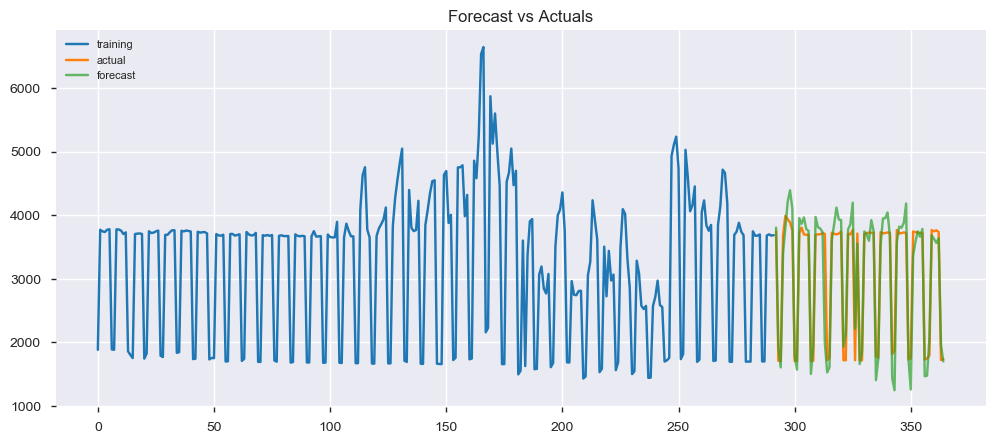

In [33]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_time, label='training')
plt.plot(actual, label='actual')
plt.plot(forecast, label='forecast', alpha = 0.7)
#plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [23]:
mse = mean_squared_error(actual.values, forecast.values)
rmse = np.sqrt(mse)
print(rmse)
from sklearn.metrics import explained_variance_score
r2 = explained_variance_score(actual.values, forecast.values)
print(r2)

310.7470943454413
0.8908211726956614
